In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Directorio actual:", os.getcwd())
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# No truncar el DataFrame por ancho de pantalla
pd.set_option('display.width', 1000)

# No truncar las filas
pd.set_option('display.max_rows', None)

# No expandir el DataFrame en forma de bloques
pd.set_option('display.expand_frame_repr', False)

'''
RESUMEN
Utilizaremos el conjunto de datos proporcionado, que incluye información detallada sobre salarios, niveles de experiencia, tipo de empleo, residencia, proporción de trabajo remoto, ubicación de la empresa y tamaño de la empresa.
El análisis se llevará a cabo a través de los siguientes pasos:

Descriptivo:

Resumen estadístico de los salarios por nivel de experiencia y tipo de empleo.
Visualización de distribuciones salariales y comparación entre diferentes grupos.

Comparativo:
Análisis de varianza para identificar diferencias significativas en salarios según los niveles de experiencia y otros factores.

Feature Description:
work_year: El año en que se recogieron los datos (2024).
experience_level: El nivel de experiencia del empleado, categorizado como 'EX' (INGENIERO EXPERTO), 'SE' (ingeniero sénior), 'MI' (ingeniero de nivel medio) o 'EN' (ingeniero de nivel inicial).
employment_type: El tipo de empleo, como tiempo completo (FT), tiempo parcial (PT), contrato (C) o autónomo (F).
job_title: El título o función del empleado dentro de la empresa, por ejemplo, ingeniero de inteligencia artificial.
salary: El salario del empleado en la moneda local (por ejemplo, 202 730 USD).
salary_currency: La moneda en la que está denominado el salario (por ejemplo, USD).
salary_in_usd:El salario convertido a dólares estadounidenses para fines de estandarización.
employee_residence: El país de residencia del empleado.
remote_ratio: La proporción que indica el alcance del trabajo remoto permitido en el puesto (0 para ningún trabajo remoto, 1 para completamente remoto).
company_location: La ubicación de la empresa donde trabaja el empleado.
company_size:El tamaño de la empresa, a menudo categorizado por el número de empleados (S para pequeña, M para mediana, L para grande).'''

url='https://raw.githubusercontent.com/juanalejandr/Proyecto_final/2005fdbd5e5242190e7291e6e7975a8ea84f4122/Proyecto_final_coder/salaries_data.csv'
df=pd.read_csv(url,sep=',')
df['ID']=range(1,len(df)+1)
df.set_index('ID', inplace=True)
print(df.head(5))
print("\n"*2)

# Chequeo de datos nulos
miss_df= df.isnull().sum()
print(miss_df)
print("\n"*2)

# Chequeo de salarios "0"
miss_0_df= (df[['salary_in_usd']]==0).sum()
print(miss_0_df)
print("\n"*2)

#Chequeo de tipos de datos
df.info()
print("\n")
convert_category= ['salary_currency','experience_level','employment_type','employee_residence','remote_ratio','company_location','company_size']
df[convert_category]=df[convert_category].astype('category')
df.info()
print("\n")

#Ordenar data agrupando por job_title similares
job_titles = df['job_title'].value_counts()
print(job_titles)
remplazar=['Data Science Manager','Data Science','Data Science Consultant','Principal Data Scientist','Lead Data Scientist','Head of Data Science ','Applied Data Scientist','Data Science Engineer','Director of Data Science']
df['job_title'] = df['job_title'].replace(remplazar, 'Data Scientist') # Data Scientist
remplazar1=['Data Analytics Manager','BI Data Analyst','Data Analytics Lead','BI Analyst','Data Analytics Manager','Business Data Analyst']
df['job_title'] = df['job_title'].replace(remplazar1, 'Data Analyst') # Data Analyst
remplazar2=['Machine Learning Scientist','Machine Learning Developer','Applied Machine Learning Scientist','Machine Learning Software Engineer','Machine Learning Researcher','Machine Learning Infrastructure Engineer','ML Engineer']
df['job_title'] = df['job_title'].replace(remplazar2, 'Machine Learning Engineer') # Machine Learning Engineer




Directorio actual: c:\Users\juana\OneDrive\Escritorio
    work_year experience_level employment_type                  job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
ID                                                                                                                                                                             
1        2024               SE              FT                AI Engineer  202730             USD         202730                 US             0               US            M
2        2024               SE              FT                AI Engineer   92118             USD          92118                 US             0               US            M
3        2024               SE              FT              Data Engineer  130500             USD         130500                 US             0               US            M
4        2024               SE              FT              Data E

In [54]:
'''Identificar y corregir grupos: en vista de que existen multiples tipos de trabajo que se asemejan
y otros que cumplen un rol muy especifico, procedemos a agrupar solo los tipos de trabajo que sean vistos desde un
aspecto mas general ("Data Scientist","Data Analyst","Machine Learning Engineer","Data Engineer"),
ademas que posean una cantidad significativa de datos que puedan contribuir a nuestro modelo'''

#Agrupar datos para crear grafico de H1: Los ingenieros de datos con mayor nivel de experiencia ('EX') reciben salarios significativamente más altos en USD
info_data=['Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer']
df_data=df[df['job_title'].isin(info_data)].copy() #filtrando tipos de trabajo 'Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer'
df_data.reset_index(drop=True, inplace=True)
miss_null_df= (df_data[['job_title']].isnull()).sum() # verificando existencia de datos nulos
print(miss_null_df)
print(df_data['job_title'].unique())# verificando que los tipos de trabajo sean 'Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer'
df_data['job_title'] = df_data['job_title'].astype('category')
print(df_data.shape)
print("\n"*2)

#Promediar salarios por experiencia laboral y tipo de trabajo
promedio_salarios_exp= df_data.groupby(['experience_level','job_title'], observed=False)['salary_in_usd'].mean().reset_index()
print(promedio_salarios_exp)
print("\n"*2)

#agrupar promedios de distintos tipo de trabajo
df_analys=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Analyst'].reset_index(drop=True) # Data Analyst
df_ml=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Machine Learning Engineer'].reset_index(drop=True) # Machine Learning Engineer
df_engy=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Engineer'].reset_index(drop=True) # Data Engineer
df_scien=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Scientist'].reset_index(drop=True) # Data Scientist
print(df_analys)



job_title    0
dtype: int64
['Data Engineer' 'Machine Learning Engineer' 'Data Analyst'
 'Data Scientist']
(12095, 11)



   experience_level                  job_title  salary_in_usd
0                EN               Data Analyst   84316.939286
1                EN              Data Engineer   94049.022901
2                EN             Data Scientist   85960.031414
3                EN  Machine Learning Engineer  104691.328571
4                EX               Data Analyst  116546.296296
5                EX              Data Engineer  194541.606452
6                EX             Data Scientist  206958.984375
7                EX  Machine Learning Engineer  226009.615385
8                MI               Data Analyst   99516.296353
9                MI              Data Engineer  120492.150502
10               MI             Data Scientist  127979.018868
11               MI  Machine Learning Engineer  162607.037940
12               SE               Data Analyst  123432.874633
13        

Text(0.02, 0.5, 'Salarios en USDT')

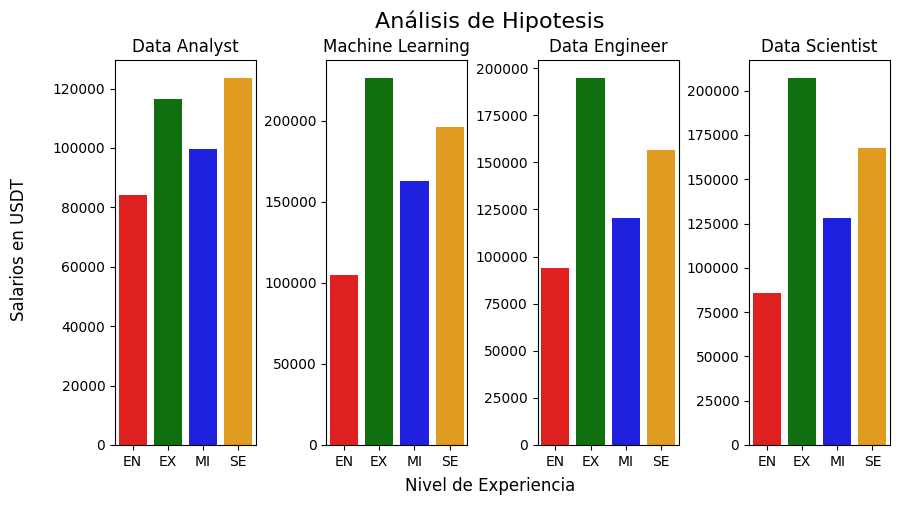

In [55]:
#Graficar Hipotesis 1
fig,axs=plt.subplots(1,4,figsize=(10,5))
p_paleta = ['red','green','blue','orange']

# Data Analyst
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_analys, palette=p_paleta, legend=False,ax=axs[0])
axs[0].set_title('Data Analyst')
axs[0].set_xlabel(' ')
axs[0].set_ylabel(' ')

# Machine Learning
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_ml, palette=p_paleta, legend=False,ax=axs[1])
axs[1].set_title('Machine Learning')
axs[1].set_xlabel(' ')
axs[1].set_ylabel(' ')

# Data Engineer
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_engy, palette=p_paleta, legend=False,ax=axs[2])
axs[2].set_title('Data Engineer')
axs[2].set_xlabel(' ')
axs[2].set_ylabel(' ')

# Data Scientist
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_scien, palette=p_paleta, legend=False,ax=axs[3])
axs[3].set_title('Data Scientist')
axs[3].set_xlabel(' ')
axs[3].set_ylabel(' ')
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Análisis de Hipotesis', fontsize=16)
fig.supxlabel('Nivel de Experiencia')
fig.supylabel('Salarios en USDT')


C:\Users\juana\AppData\Local\Temp\ipykernel_18864\3557882058.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_data['experience_level']=df_data['experience_level'].replace(map_dict)


int32
experience_level
3    7929
2    2878
1     952
4     336
Name: count, dtype: int64


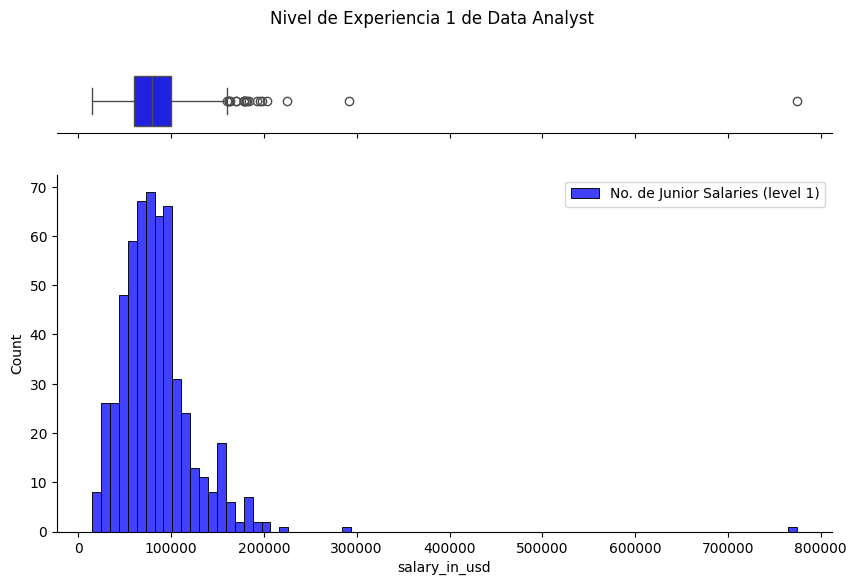

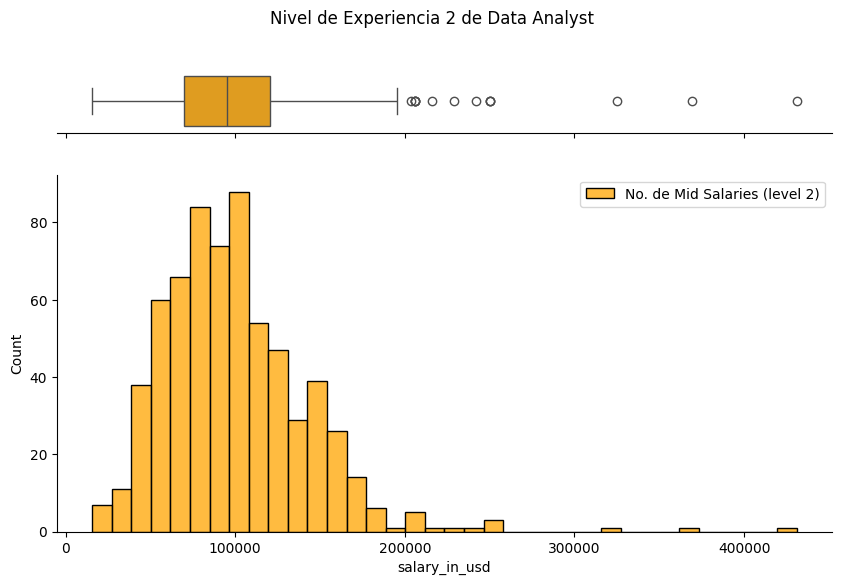

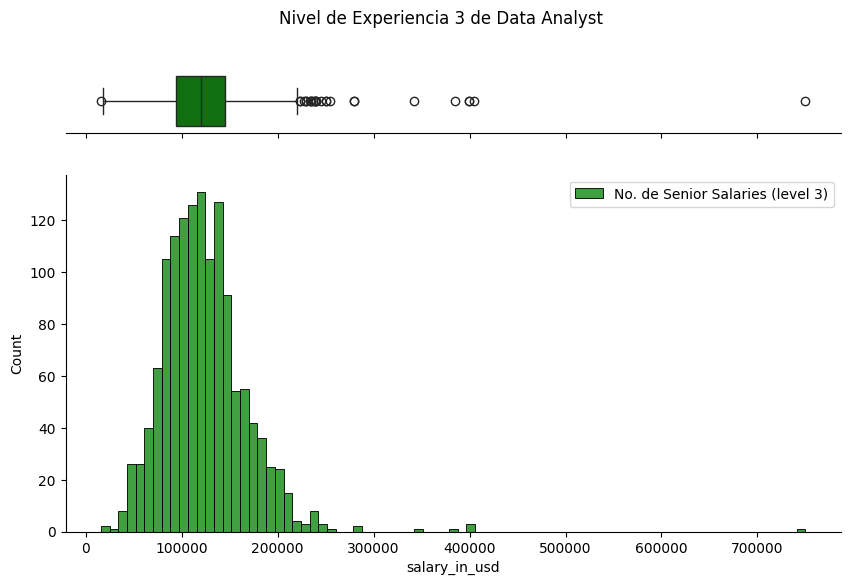

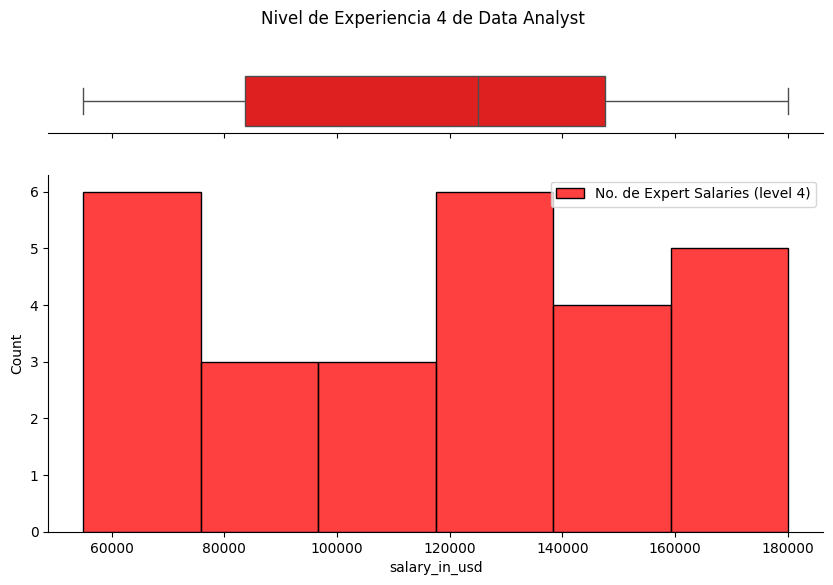

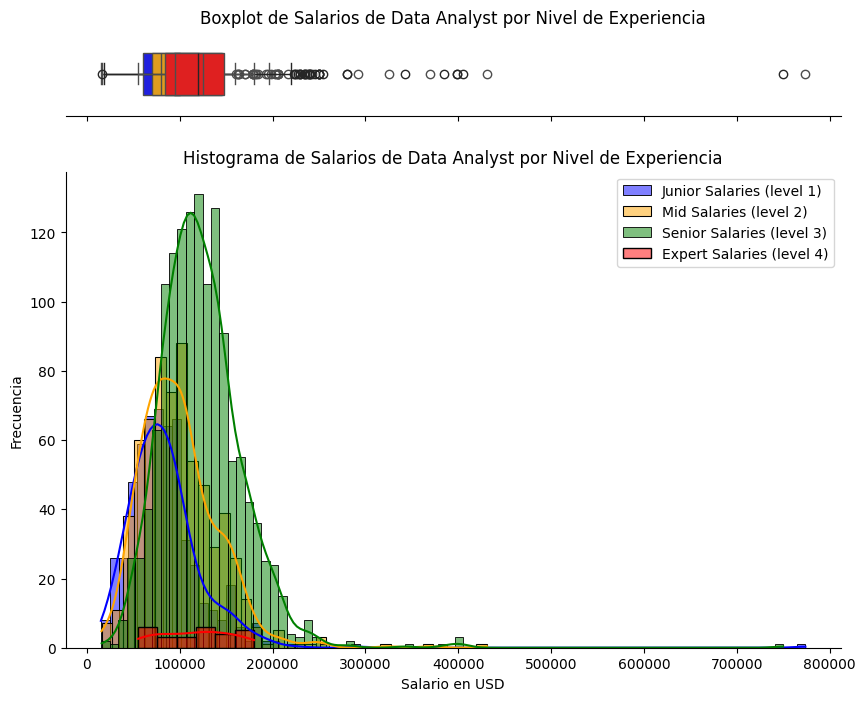

In [56]:

#Identificar y tratar valores atípicos (outliers)
remplazar3=['EN','EX','MI','SE'] #reemplazando valores categoricos 'object' por int
sustituto=['1','4','2','3']      # donde 'EN'(junior)=1 / 'MI'(midlevel)=2 / 'SE'(senior)=3 / 'EX'(experto)=4
map_dict = dict(zip(remplazar3, sustituto))
df_data['experience_level']=df_data['experience_level'].replace(map_dict)
df_data['experience_level']=df_data['experience_level'].astype(int)
print(df_data['experience_level'].dtype)
print(df_data['experience_level'].value_counts())

# Data Analyst
#nivel de experiencia 1
data_analyst_1 = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 1)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_analyst_1,color='blue', ax=ax_box, orient='h')

# Crear el histograma
sns.histplot(data_analyst_1,color='blue', ax=ax_hist, label='No. de Junior Salaries (level 1)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 1 de Data Analyst')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 2
data_analyst_2 = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 2)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_analyst_2, ax=ax_box,color='orange', orient='h')

# Crear el histograma
sns.histplot(data_analyst_2, ax=ax_hist,color='orange', label='No. de Mid Salaries (level 2)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 2 de Data Analyst')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 3
data_analyst_3 = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 3)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_analyst_3, ax=ax_box,color='green', orient='h')

# Crear el histograma
sns.histplot(data_analyst_3, ax=ax_hist,color='green', label='No. de Senior Salaries (level 3)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 3 de Data Analyst')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 4
data_analyst_4 = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_analyst_4, ax=ax_box,color='red', orient='h')

# Crear el histograma
sns.histplot(data_analyst_4, ax=ax_hist,color='red', label='No. de Expert Salaries (level 4)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 4 de Data Analyst')
# Mostrar la gráfica
plt.show()
print("\n"*2)


# Filtrar los datos de 'Data Analyst' para cada nivel de experiencia
data_analyst_junior_salaries = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 1)]['salary_in_usd']
data_analyst_mid_salaries = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 2)]['salary_in_usd']
data_analyst_senior_salaries = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 3)]['salary_in_usd']
data_analyst_expert_salaries = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot para cada nivel de experiencia
sns.boxplot(x=data_analyst_junior_salaries, ax=ax_box, orient='h', color='blue', width=0.5)
sns.boxplot(x=data_analyst_mid_salaries, ax=ax_box, orient='h', color='orange', width=0.5)
sns.boxplot(x=data_analyst_senior_salaries, ax=ax_box, orient='h', color='green', width=0.5)
sns.boxplot(x=data_analyst_expert_salaries, ax=ax_box, orient='h', color='red', width=0.5)

# Crear el histograma para cada nivel de experiencia
sns.histplot(data_analyst_junior_salaries, ax=ax_hist, label='Junior Salaries (level 1)', color='blue', kde=True)
sns.histplot(data_analyst_mid_salaries, ax=ax_hist, label='Mid Salaries (level 2)', color='orange', kde=True)
sns.histplot(data_analyst_senior_salaries, ax=ax_hist, label='Senior Salaries (level 3)', color='green', kde=True)
sns.histplot(data_analyst_expert_salaries, ax=ax_hist, label='Expert Salaries (level 4)', color='red', kde=True)

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Añadir títulos y etiquetas
ax_box.set_title('Boxplot de Salarios de Data Analyst por Nivel de Experiencia')
ax_hist.set_title('Histograma de Salarios de Data Analyst por Nivel de Experiencia')
ax_hist.set_xlabel('Salario en USD')
ax_hist.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


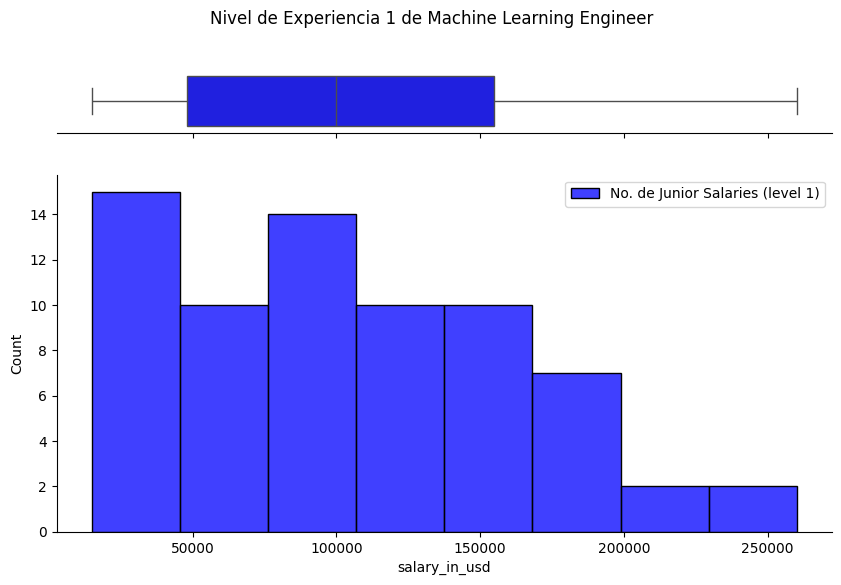

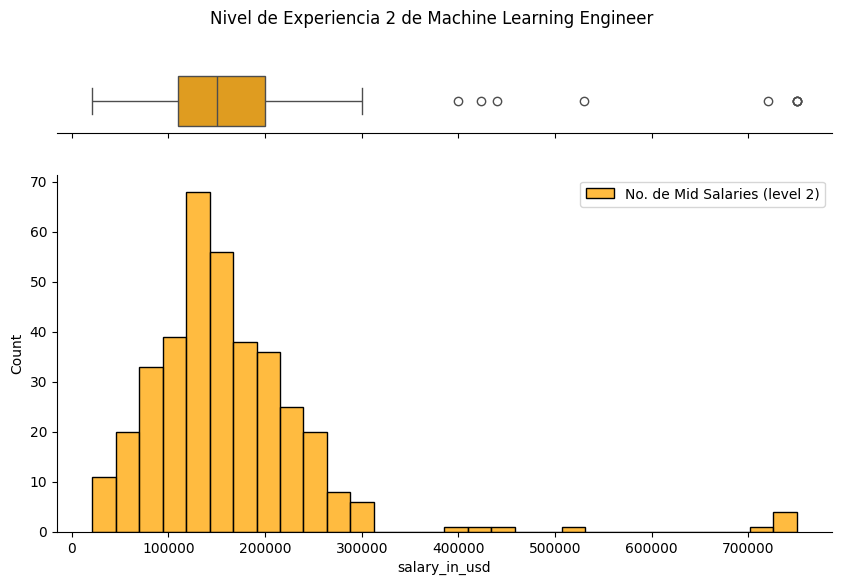

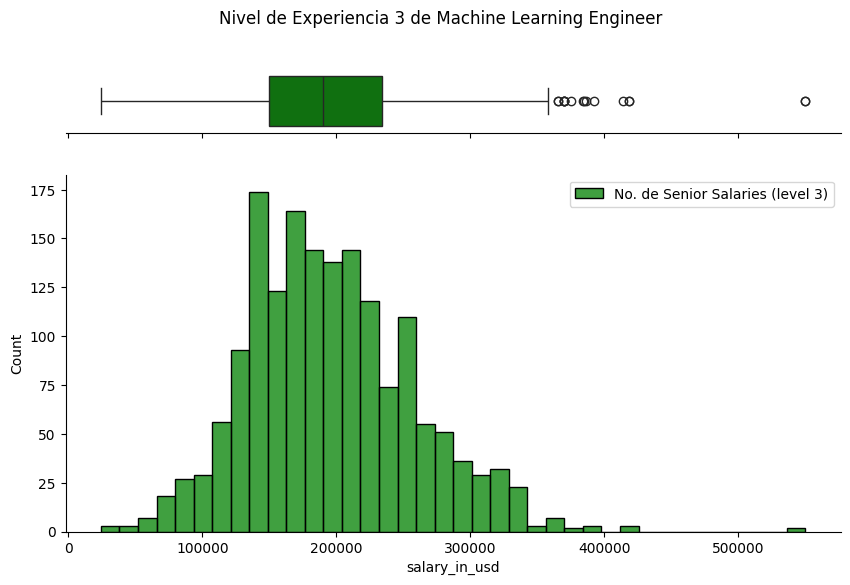

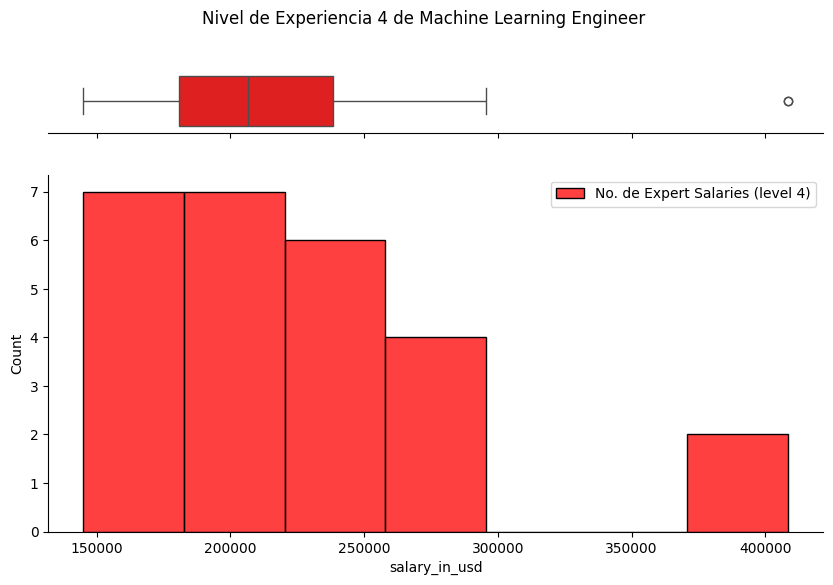

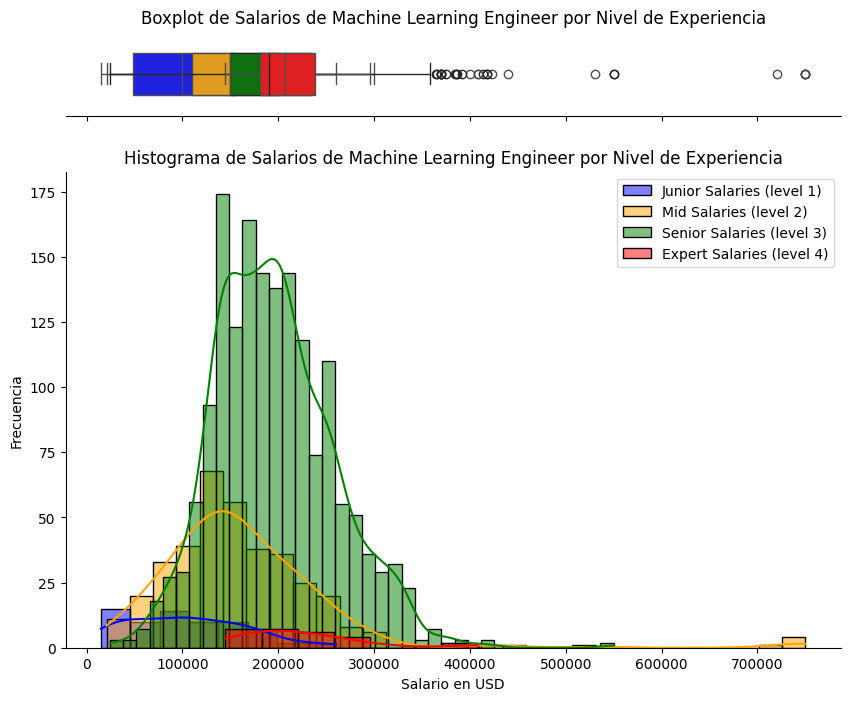

In [57]:
# Machine Learning Engineer
#nivel de experiencia 1
data_ml_1 = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 1)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_ml_1,color='blue', ax=ax_box, orient='h')

# Crear el histograma
sns.histplot(data_ml_1,color='blue', ax=ax_hist, label='No. de Junior Salaries (level 1)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 1 de Machine Learning Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 2
data_ml_2 = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 2)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_ml_2, ax=ax_box,color='orange', orient='h')

# Crear el histograma
sns.histplot(data_ml_2, ax=ax_hist,color='orange', label='No. de Mid Salaries (level 2)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 2 de Machine Learning Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 3
data_ml_3 = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 3)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_ml_3, ax=ax_box,color='green', orient='h')

# Crear el histograma
sns.histplot(data_ml_3, ax=ax_hist,color='green', label='No. de Senior Salaries (level 3)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 3 de Machine Learning Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 4
data_ml_4 = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_ml_4, ax=ax_box,color='red', orient='h')

# Crear el histograma
sns.histplot(data_ml_4, ax=ax_hist,color='red', label='No. de Expert Salaries (level 4)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 4 de Machine Learning Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)


# Filtrar los datos de 'Machine Learning Engineer' para cada nivel de experiencia
ml_junior_salaries = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 1)]['salary_in_usd']
ml_mid_salaries = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 2)]['salary_in_usd']
ml_senior_salaries = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 3)]['salary_in_usd']
ml_expert_salaries = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot para cada nivel de experiencia
sns.boxplot(x=ml_junior_salaries, ax=ax_box, orient='h', color='blue', width=0.5)
sns.boxplot(x=ml_mid_salaries, ax=ax_box, orient='h', color='orange', width=0.5)
sns.boxplot(x=ml_senior_salaries, ax=ax_box, orient='h', color='green', width=0.5)
sns.boxplot(x=ml_expert_salaries, ax=ax_box, orient='h', color='red', width=0.5)

# Crear el histograma para cada nivel de experiencia
sns.histplot(ml_junior_salaries, ax=ax_hist, label='Junior Salaries (level 1)', color='blue', kde=True)
sns.histplot(ml_mid_salaries, ax=ax_hist, label='Mid Salaries (level 2)', color='orange', kde=True)
sns.histplot(ml_senior_salaries, ax=ax_hist, label='Senior Salaries (level 3)', color='green', kde=True)
sns.histplot(ml_expert_salaries, ax=ax_hist, label='Expert Salaries (level 4)', color='red', kde=True)

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Añadir títulos y etiquetas
ax_box.set_title('Boxplot de Salarios de Machine Learning Engineer por Nivel de Experiencia')
ax_hist.set_title('Histograma de Salarios de Machine Learning Engineer por Nivel de Experiencia')
ax_hist.set_xlabel('Salario en USD')
ax_hist.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

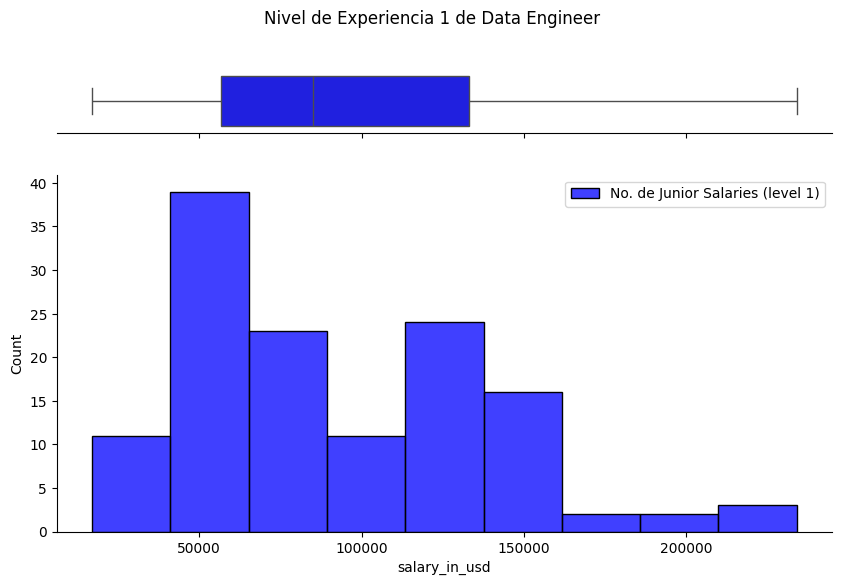

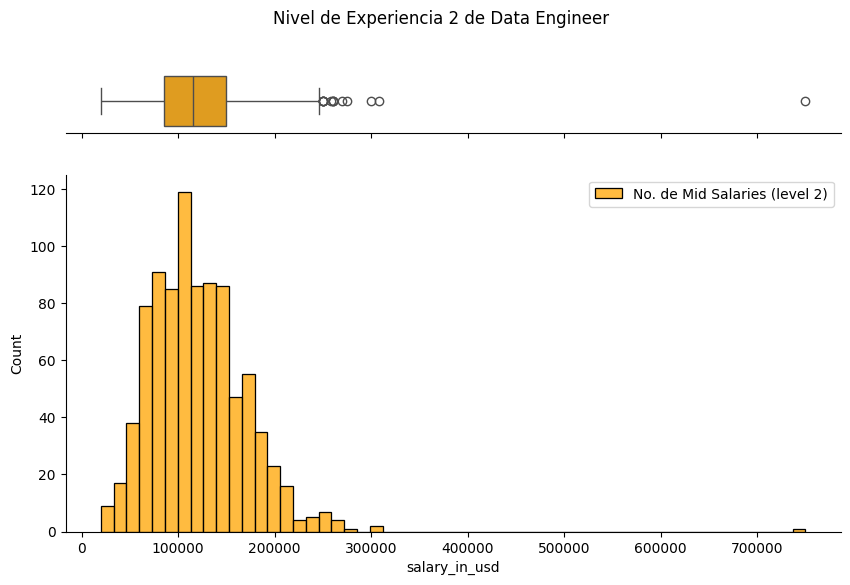

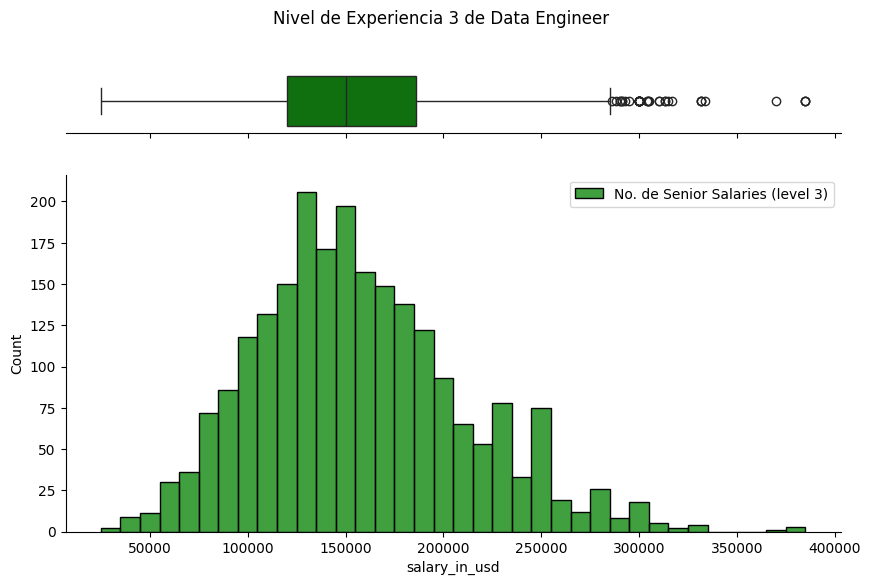

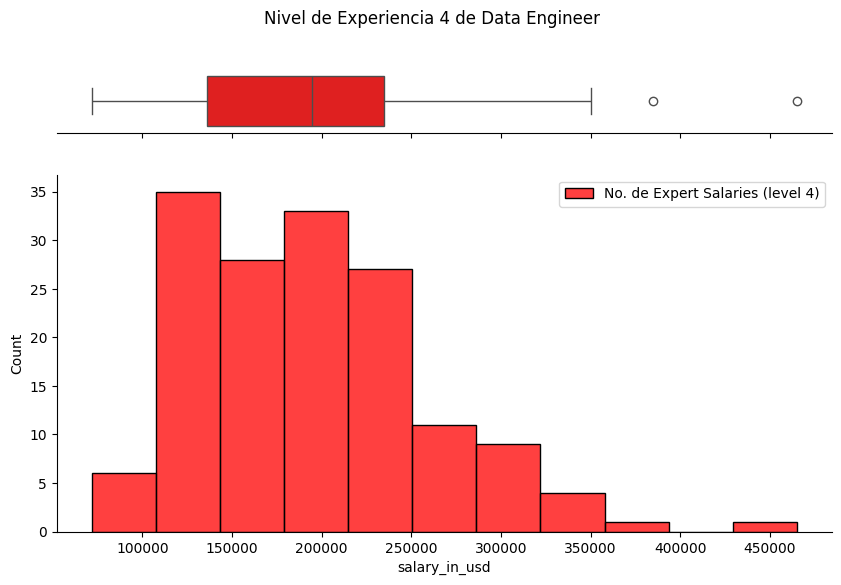

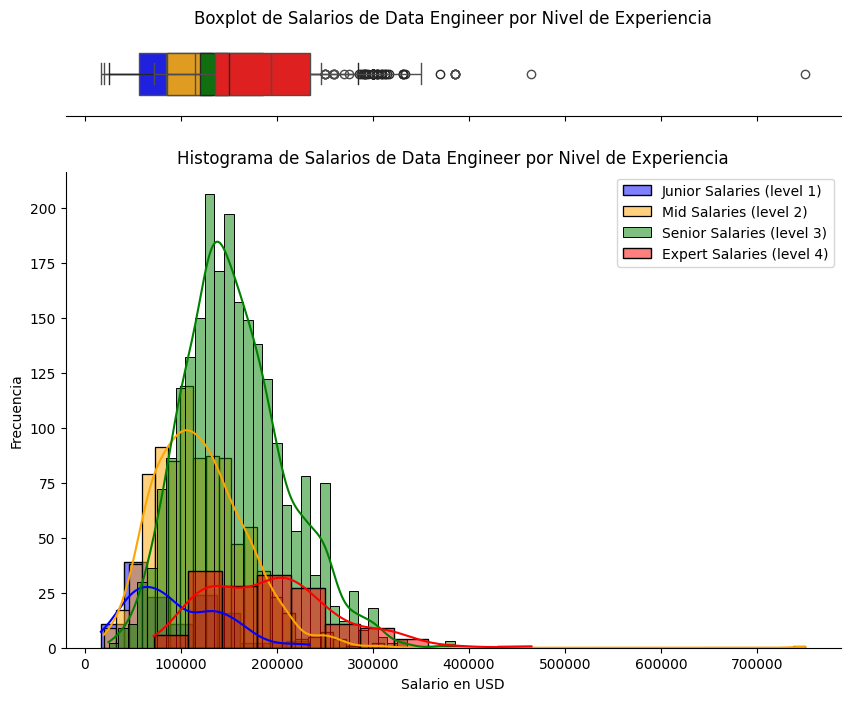

In [58]:
# Data Engineer
#nivel de experiencia 1
data_en_1 = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 1)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_en_1,color='blue', ax=ax_box, orient='h')

# Crear el histograma
sns.histplot(data_en_1,color='blue', ax=ax_hist, label='No. de Junior Salaries (level 1)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 1 de Data Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 2
data_en_2 = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 2)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_en_2, ax=ax_box,color='orange', orient='h')

# Crear el histograma
sns.histplot(data_en_2, ax=ax_hist,color='orange', label='No. de Mid Salaries (level 2)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 2 de Data Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 3
data_en_3 = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 3)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_en_3, ax=ax_box,color='green', orient='h')

# Crear el histograma
sns.histplot(data_en_3, ax=ax_hist,color='green', label='No. de Senior Salaries (level 3)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 3 de Data Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 4
data_en_4 = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_en_4, ax=ax_box,color='red', orient='h')

# Crear el histograma
sns.histplot(data_en_4, ax=ax_hist,color='red', label='No. de Expert Salaries (level 4)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 4 de Data Engineer')
# Mostrar la gráfica
plt.show()
print("\n"*2)


# Filtrar los datos de 'Data Engineer' para cada nivel de experiencia
en_junior_salaries = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 1)]['salary_in_usd']
en_mid_salaries = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 2)]['salary_in_usd']
en_senior_salaries = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 3)]['salary_in_usd']
en_expert_salaries = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot para cada nivel de experiencia
sns.boxplot(x=en_junior_salaries, ax=ax_box, orient='h', color='blue', width=0.5)
sns.boxplot(x=en_mid_salaries, ax=ax_box, orient='h', color='orange', width=0.5)
sns.boxplot(x=en_senior_salaries, ax=ax_box, orient='h', color='green', width=0.5)
sns.boxplot(x=en_expert_salaries, ax=ax_box, orient='h', color='red', width=0.5)

# Crear el histograma para cada nivel de experiencia
sns.histplot(en_junior_salaries, ax=ax_hist, label='Junior Salaries (level 1)', color='blue', kde=True)
sns.histplot(en_mid_salaries, ax=ax_hist, label='Mid Salaries (level 2)', color='orange', kde=True)
sns.histplot(en_senior_salaries, ax=ax_hist, label='Senior Salaries (level 3)', color='green', kde=True)
sns.histplot(en_expert_salaries, ax=ax_hist, label='Expert Salaries (level 4)', color='red', kde=True)

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Añadir títulos y etiquetas
ax_box.set_title('Boxplot de Salarios de Data Engineer por Nivel de Experiencia')
ax_hist.set_title('Histograma de Salarios de Data Engineer por Nivel de Experiencia')
ax_hist.set_xlabel('Salario en USD')
ax_hist.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

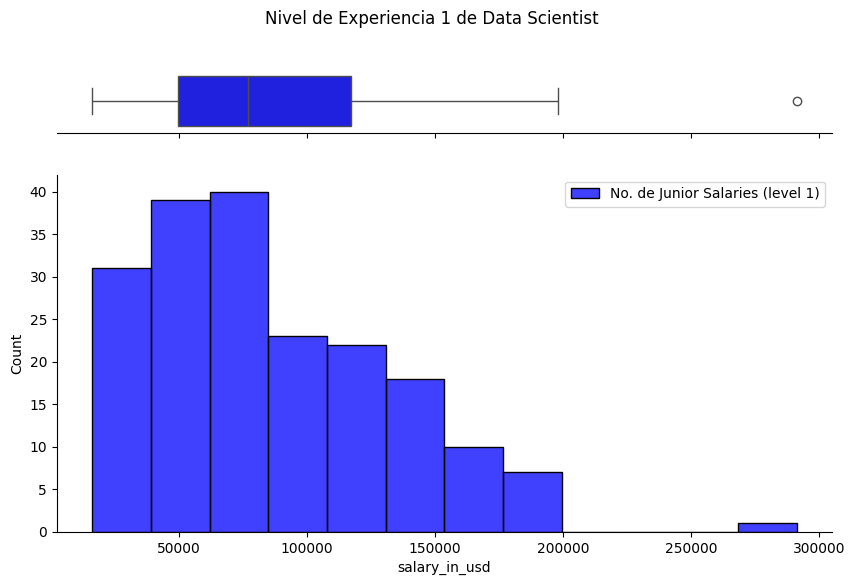

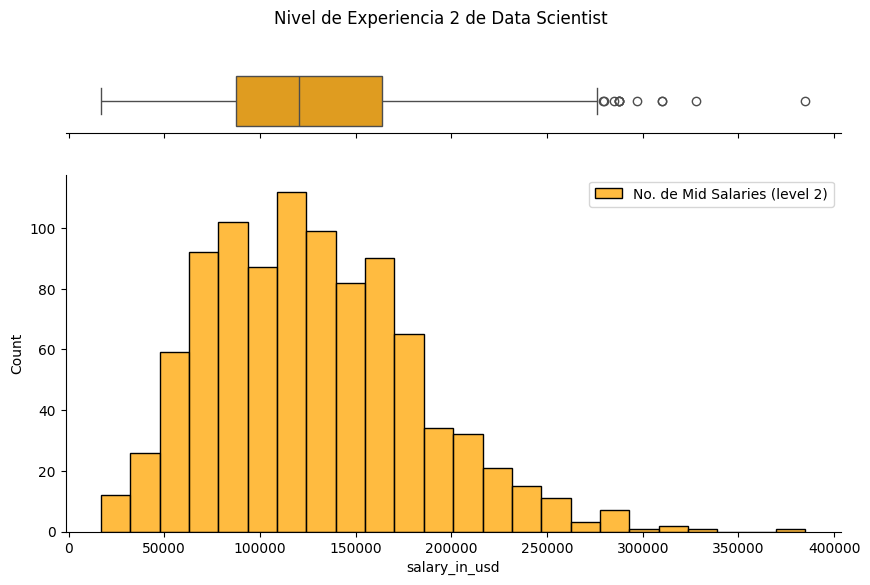

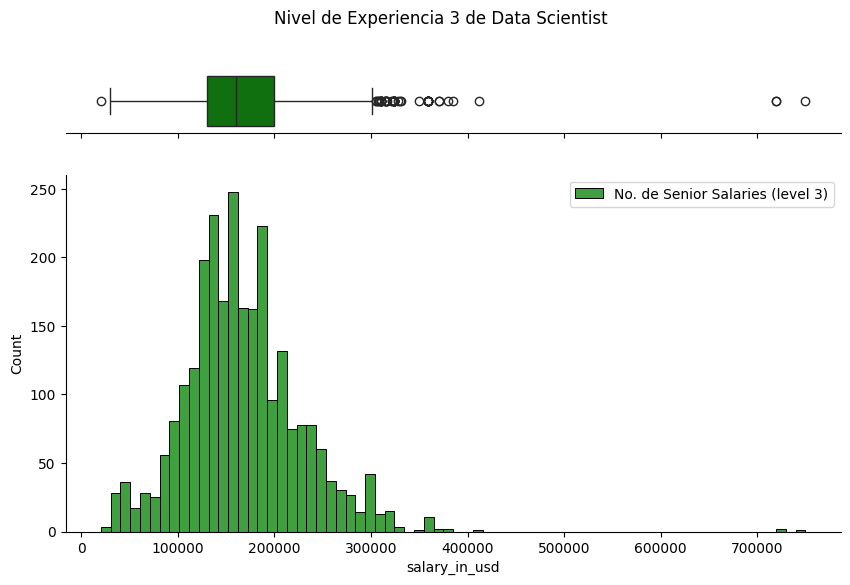

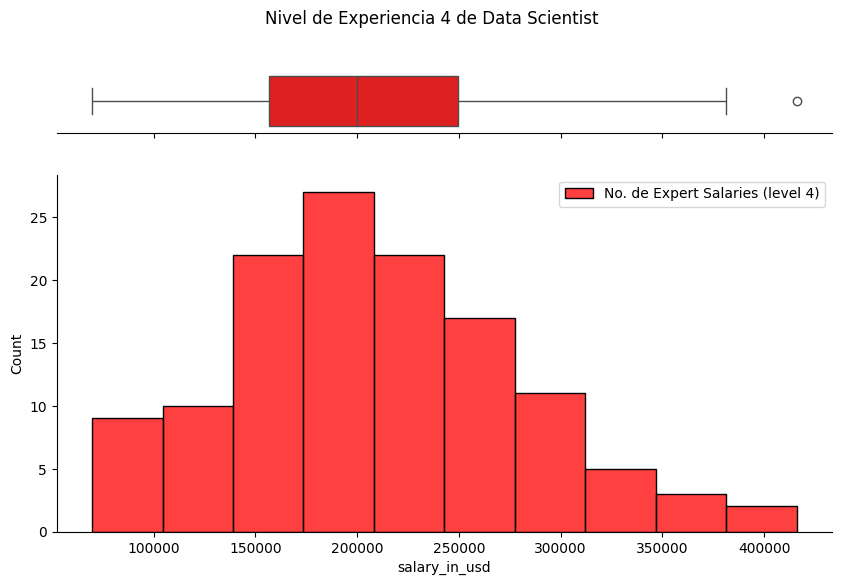

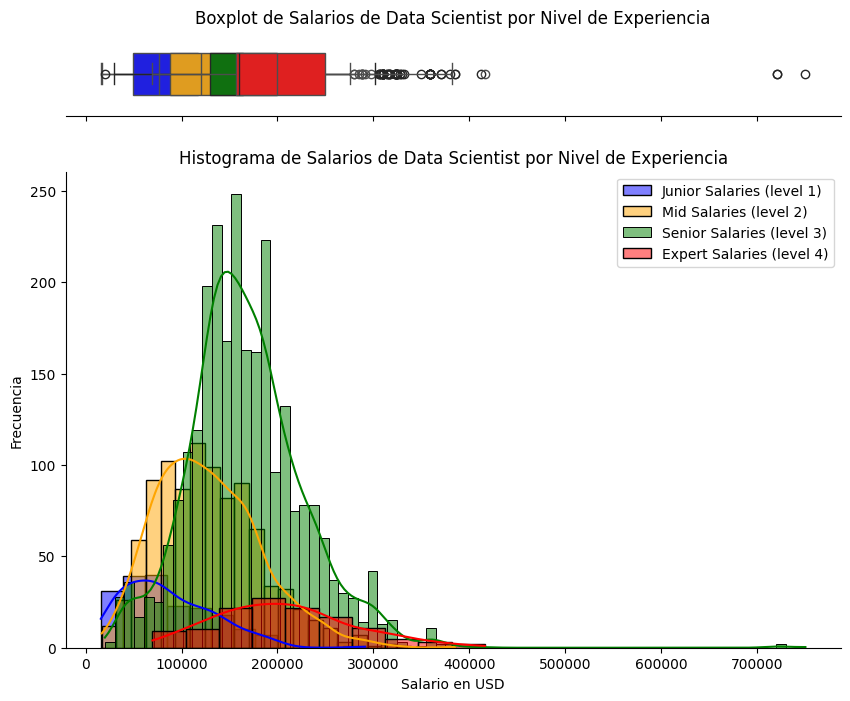

In [59]:
# Data Scientist
#nivel de experiencia 1
data_sc_1 = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 1)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_sc_1,color='blue', ax=ax_box, orient='h')

# Crear el histograma
sns.histplot(data_sc_1,color='blue', ax=ax_hist, label='No. de Junior Salaries (level 1)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 1 de Data Scientist')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 2
data_sc_2 = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 2)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_sc_2, ax=ax_box,color='orange', orient='h')

# Crear el histograma
sns.histplot(data_sc_2, ax=ax_hist,color='orange', label='No. de Mid Salaries (level 2)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 2 de Data Scientist')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 3
data_sc_3 = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 3)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_sc_3, ax=ax_box,color='green', orient='h')

# Crear el histograma
sns.histplot(data_sc_3, ax=ax_hist,color='green', label='No. de Senior Salaries (level 3)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 3 de Data Scientist')
# Mostrar la gráfica
plt.show()
print("\n"*2)

#nivel de experiencia 4
data_sc_4 = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot
sns.boxplot(x=data_sc_4, ax=ax_box,color='red', orient='h')

# Crear el histograma
sns.histplot(data_sc_4, ax=ax_hist,color='red', label='No. de Expert Salaries (level 4)')

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
fig.suptitle('Nivel de Experiencia 4 de Data Scientist')
# Mostrar la gráfica
plt.show()
print("\n"*2)


# Filtrar los datos de 'Data Scientist' para cada nivel de experiencia
sc_junior_salaries = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 1)]['salary_in_usd']
sc_mid_salaries = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 2)]['salary_in_usd']
sc_senior_salaries = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 3)]['salary_in_usd']
sc_expert_salaries = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['experience_level'] == 4)]['salary_in_usd']

# Crear la figura y los ejes
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})

# Crear el boxplot para cada nivel de experiencia
sns.boxplot(x=sc_junior_salaries, ax=ax_box, orient='h', color='blue', width=0.5)
sns.boxplot(x=sc_mid_salaries, ax=ax_box, orient='h', color='orange', width=0.5)
sns.boxplot(x=sc_senior_salaries, ax=ax_box, orient='h', color='green', width=0.5)
sns.boxplot(x=sc_expert_salaries, ax=ax_box, orient='h', color='red', width=0.5)

# Crear el histograma para cada nivel de experiencia
sns.histplot(sc_junior_salaries, ax=ax_hist, label='Junior Salaries (level 1)', color='blue', kde=True)
sns.histplot(sc_mid_salaries, ax=ax_hist, label='Mid Salaries (level 2)', color='orange', kde=True)
sns.histplot(sc_senior_salaries, ax=ax_hist, label='Senior Salaries (level 3)', color='green', kde=True)
sns.histplot(sc_expert_salaries, ax=ax_hist, label='Expert Salaries (level 4)', color='red', kde=True)

# Configuración adicional
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Añadir títulos y etiquetas
ax_box.set_title('Boxplot de Salarios de Data Scientist por Nivel de Experiencia')
ax_hist.set_title('Histograma de Salarios de Data Scientist por Nivel de Experiencia')
ax_hist.set_xlabel('Salario en USD')
ax_hist.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [60]:
#calcular coeficiente de correlacion entre X & Y
corr_coef=df_data[df_data['job_title']=='Data Scientist']['experience_level'].corr(df_data[df_data['job_title']=='Data Scientist']['salary_in_usd'],method='pearson')
print('coeficinte de correlación: ', corr_coef) #Imprimir

''' En vista de que en todos los casos tengo datos outlier por encima de mi tercer cuartil de salarios en USD,
para los distintos tipos de trabajo y son casos los cuales pueden estar ligados a cargos altos o propuestas 
de contrato con condiciones especificas, las cuales escapan de nuestro analisis, nos limitaremos a descartarlos para
poder mejorar el coeficiente de correlaciòn de nuestras variables, para el modelo de ML'''

#funcion para remover datos ouliers mayores al 3er cuartil
def remove_upper_outliers(df, job_title, exp_level):
    subset = df[(df['job_title'] == job_title) & (df['experience_level'] == exp_level)]
    C3 = subset['salary_in_usd'].quantile(0.75)
    IQR = C3 - subset['salary_in_usd'].quantile(0.25)
    upper_bound = C3 + 1.5 * IQR
    return df[~((df['job_title'] == job_title) & (df['experience_level'] == exp_level) & (df['salary_in_usd'] > upper_bound))]

# Lista de títulos de trabajo a considerar
job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']

# Eliminar outliers por encima de Q3 para cada combinación de job_title y experience_level
for job in job_titles:
    for level in range(1, 5):  # experience_level: 1, 2, 3, 4
        df_data = remove_upper_outliers(df_data, job, level)
print("\n"*2)

# Mostrar la cantidad de registros restantes
print("                                    filas , columnas") 
print('mi dataframe estara conformado por:',df_data.shape)

coeficinte de correlación:  0.38566655589634785



                                    filas , columnas
mi dataframe estara conformado por: (11888, 11)


In [61]:
#calcular coeficiente de correlacion entre X & Y
corr_coef=df_data[df_data['job_title']=='Data Scientist']['experience_level'].corr(df_data[df_data['job_title']=='Data Scientist']['salary_in_usd'],method='pearson')
print('coeficinte de correlación:a cargos de Data Scientist: ', corr_coef) #Imprimir

''' en vista de quye mejoro significativamente mi coeficiente de correlacion de variables, procedo a contruir mi modelo'''
#preparando datos para Modelo de regresion lineal

# Filtrar datos para 'Data Scientist'
df_data_scientist = df_data[df_data['job_title'] == 'Data Scientist']

X = df_data_scientist[['experience_level']]
print(X)
Y = df_data_scientist['salary_in_usd'].astype(int)
print(Y)

coeficinte de correlación:a cargos de Data Scientist:  0.4141712405149378
       experience_level
10                    2
11                    2
26                    2
27                    2
28                    2
29                    2
30                    2
31                    2
36                    3
37                    3
42                    2
43                    2
44                    3
45                    3
46                    3
47                    3
64                    3
65                    3
66                    3
67                    3
68                    2
69                    2
70                    2
71                    2
80                    3
81                    3
91                    4
92                    4
93                    3
94                    3
101                   2
102                   2
109                   1
110                   1
111                   4
112                   4
117                   2
118           

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=0) # 70% para entrenar y 30% para test

#Entrenamos el modelo con los datos 
regresor=LinearRegression()
regresor.fit(x_train, y_train)



LinearRegression()

In [73]:
#Obtener pendiente
slope= regresor.coef_

#Obtener los coeficientes de intercepción
intercept=regresor.intercept_

print('valor de la pendiente: ',slope.round(1))
print('valor del intercepto: ',intercept.round(1))
print("\n")
print(f'la ecuación de la recta de mejor ajuste es: {slope.round(1)}* X + {intercept.round(1)}')
''' Quiere decir que si ingreso mi nivel de experiencia me devolvera el salario que debe ganara como Data Scientist'''


valor de la pendiente:  [38555.4]
valor del intercepto:  47979.6


la ecuación de la recta de mejor ajuste es: [38555.4]* X + 47979.6


Text(0, 0.5, 'salario en USD')

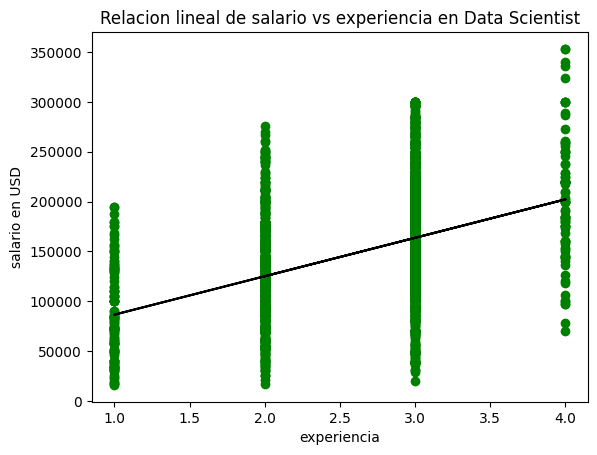

In [74]:
#Visualización de datos de entrenamiento

vista_train= plt
vista_train.scatter(x_train, y_train, color='g')
vista_train.plot(x_train, regresor.predict(x_train), color='black')
vista_train.title('Relacion lineal de salario vs experiencia en Data Scientist')
vista_train.xlabel('experiencia')
vista_train.ylabel('salario en USD')

Text(0, 0.5, 'salario en USD')

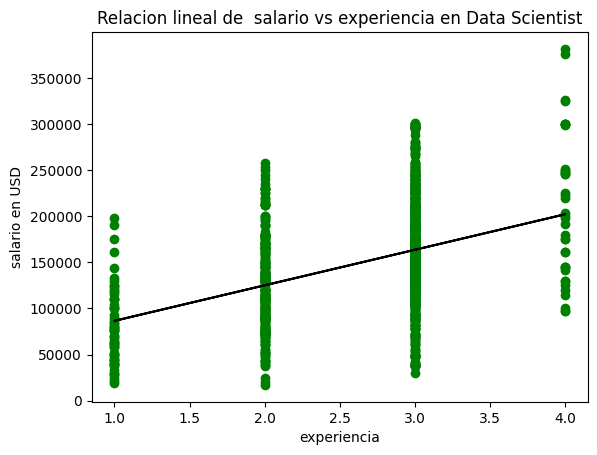

In [70]:
#Visualización de datos de prueba

vista_train= plt
vista_train.scatter(x_test, y_test, color='g')
vista_train.plot(x_test, regresor.predict(x_test), color='black')
vista_train.title('Relacion lineal de  salario vs experiencia en Data Scientist')
vista_train.xlabel('experiencia')
vista_train.ylabel('salario en USD')

In [82]:
y_pred= regresor.predict(x_test)
y_pred.round(0)
y_test.round(0)

1822     148000
11076    180000
280      190000
1944     160000
9700     123900
6818     172758
1584      62500
6888     226000
1069     149925
9221     203500
11755    176000
5886     195000
8302     169000
9972     156400
1756     240000
152      127300
2887     199000
10972    135000
7779     126000
10555    120000
9257     145000
12059     21669
6317     250000
2713      97060
1650     200740
6336     110000
7332     230000
5085     187415
8081     295490
8568     258000
10049    231250
12028     90734
11861     67597
7299     181000
10508    128000
9742     122000
3217     130000
4299     157000
1442     180000
5568     118000
2355     140000
6410     162000
2041      68750
2781     100000
1218     185400
6693     138900
2458     125000
11351    136994
10334    300000
8866      77791
1306     220000
1176     100200
4589     119200
4975     150000
8723     155000
8303     129300
9056     219000
11404    191475
3129     156400
5651     225300
9331     180000
2915     160000
3739    

In [83]:
#coeficiente de determinación de model de entrenamiento
regresor.score(x_train,y_train)

0.16783544122817218

In [84]:
#coeficiente de determinación de model de prueba
regresor.score(x_test,y_test)

0.17933978237060044

In [68]:
#Input para ingresar Nivel de experiencia para Data Scientist
# donde 'EN'(junior)=1 / 'MI'(midlevel)=2 / 'SE'(senior)=3 / 'EX'(experto)=4
level_exp=int(input('Ingresa que nivel de experiencia que tienes donde "EN"(junior)=1 / "MI"(midlevel)=2 / "SE"(senior)=3 / "EX"(experto)=4'))

# Convertir la entrada a DataFrame con el nombre de columna correcto
level_exp_df = pd.DataFrame([[level_exp]], columns=['experience_level'])

# Predicción del salario que debería ganar de acuerdo al nivel de experiencia que posee como Data Scientist 
user_salary = regresor.predict(level_exp_df)
print(f'El salario estimado para un Data Scientist con nivel de experiencia {level_exp} es: {user_salary[0].round(2)} USD')

El salario estimado para un Data Scientist con nivel de experiencia 3 es: 163645.86 USD
